# Final assignment
Hannah Weiser \
Heidelberg University \
Institute of Geography \
Advanced Geoscripting \
Summer term 2020

The goal of the project is to perform an explorative data analysis on a specific species of digger wasps and their prey. We are using the GBIF (Global Biodiversity Information Facility) API. GBIF provides free and open access to biodiversity data (https://www.gbif.org/).

First, we import the packages.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn') #nicer figure style
from pygbif import occurrences as occ  # python client for the GBIF API 
from pygbif import species
import mplleaflet #for basemaps

And then download occurence data of *Isodontia mexicana*.

In [2]:
isodontia_dict = occ.search(scientificName = 'Isodontia mexicana')
isodontia_occs = isodontia_dict['results']

What are the keys in the first occurence?

In [3]:
display(isodontia_occs[0].keys())

dict_keys(['key', 'datasetKey', 'publishingOrgKey', 'installationKey', 'publishingCountry', 'protocol', 'lastCrawled', 'lastParsed', 'crawlId', 'extensions', 'basisOfRecord', 'occurrenceStatus', 'taxonKey', 'kingdomKey', 'phylumKey', 'classKey', 'orderKey', 'familyKey', 'genusKey', 'speciesKey', 'acceptedTaxonKey', 'scientificName', 'acceptedScientificName', 'kingdom', 'phylum', 'order', 'family', 'genus', 'species', 'genericName', 'specificEpithet', 'taxonRank', 'taxonomicStatus', 'dateIdentified', 'decimalLongitude', 'decimalLatitude', 'coordinateUncertaintyInMeters', 'stateProvince', 'year', 'month', 'day', 'eventDate', 'issues', 'modified', 'lastInterpreted', 'references', 'license', 'identifiers', 'media', 'facts', 'relations', 'gadm', 'geodeticDatum', 'class', 'countryCode', 'recordedByIDs', 'identifiedByIDs', 'country', 'rightsHolder', 'identifier', 'http://unknown.org/nick', 'verbatimEventDate', 'datasetName', 'gbifID', 'collectionCode', 'verbatimLocality', 'occurrenceID', 'tax

What's the geodetic datum of the first occurence?

In [4]:
display(isodontia_occs[0]['geodeticDatum'])

'WGS84'

For further analyses, we want to work with a dataframe instead of a dictionary.

In [5]:
df_isodontia = pd.DataFrame.from_dict(isodontia_occs)
#convert some date columns to datetime
df_isodontia = df_isodontia.astype({'eventDate':'datetime64', 'dateIdentified':'datetime64'})
display(df_isodontia.head(3))

,key,datasetKey,publishingOrgKey,installationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,extensions,...,sex,lifeStage,eventRemarks,taxonRemarks,organismRemarks,collectionID,individualCount,continent,dataGeneralizations,higherClassification
0,2597845815,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-11-08T15:17:22.361+0000,2020-11-08T16:53:35.200+0000,239,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2603300247,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-11-08T15:17:22.361+0000,2020-11-08T16:53:48.184+0000,239,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2626578683,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-11-08T15:17:22.361+0000,2020-11-08T17:08:18.846+0000,239,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's also save this to a csv-file immediately, so our workflow will be really reproducible.

In [6]:
df_isodontia.to_csv("gbif_occ_isodontia_mexicana.csv")

For plotting later, we have to make sure our Lat and Long columns do not contain NaN values, otherwise we will not get a plot with mplleaflet basemap.
Let's check if there are NaNs.

In [7]:
print(df_isodontia[['decimalLatitude', 'decimalLongitude']].isnull().sum().sum())

2


Looks like we have an entry with NaN values. We remove it with the `pd.dropna()` method.

In [8]:
df_isodontia = df_isodontia.dropna(subset=['decimalLatitude', 'decimalLongitude'])
print(df_isodontia[['decimalLatitude', 'decimalLongitude']].isnull().sum().sum())

0


Great. We should convert our dataframe to a geodataframe as we are working with spatial data.

In [9]:
gdf_isodontia = gpd.GeoDataFrame(df_isodontia, geometry=gpd.points_from_xy(df_isodontia.decimalLongitude, df_isodontia.decimalLatitude))
display(gdf_isodontia.head(3))

,key,datasetKey,publishingOrgKey,installationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,extensions,...,lifeStage,eventRemarks,taxonRemarks,organismRemarks,collectionID,individualCount,continent,dataGeneralizations,higherClassification,geometry
0,2597845815,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-11-08T15:17:22.361+0000,2020-11-08T16:53:35.200+0000,239,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-100.38803 20.52219)
1,2603300247,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-11-08T15:17:22.361+0000,2020-11-08T16:53:48.184+0000,239,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-97.88640 30.20881)
2,2626578683,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-11-08T15:17:22.361+0000,2020-11-08T17:08:18.846+0000,239,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-92.92551 45.00075)


Notice that we now have a `geometry`column. 
Let's plot it now. We will colour the points of occurences by the eventDate.

In [10]:
fig, ax = plt.subplots(figsize=((20,5)))
gdf_isodontia.plot(ax=ax, c=gdf_isodontia['eventDate'], cmap='Blues')
mplleaflet.display(fig=fig)

c:\users\hannah\anaconda3\envs\gbif\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
c:\users\hannah\anaconda3\envs\gbif\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


If our dataset was complete, this could help finding out how the species was spreading. Let's check when the observations were made.

In [11]:
print("Earliest observation in dataset:", gdf_isodontia['eventDate'].min())
print("Earliest observation in dataset:", gdf_isodontia['eventDate'].max())

Earliest observation in dataset: 2019-04-08 16:53:50
Earliest observation in dataset: 2020-09-28 13:41:11


We only have observations from 2019 and 2020. This is because there is a maximum of 300 occurences that we can query with gbif (at a time).

However, we now want to look at one of the preys of this species and its distribution. Let's get the data. We will write a function, so we can easily retrieve the data for many different species.

In [12]:
def species_occurences_to_gdf(species_name):
    occ_dict = occ.search(scientificName=species_name)
    occ_df = pd.DataFrame.from_dict(occ_dict['results'])
    occ_df = occ_df.astype({'dateIdentified':'datetime64', 'eventDate':'datetime64'})
    occ_df = occ_df.dropna(subset=['decimalLatitude', 'decimalLongitude'])
    occ_df.to_csv("gbif_occ_" + species_name.replace(" ","_") + ".csv")
    occ_gdf = gpd.GeoDataFrame(occ_df, geometry=gpd.points_from_xy(occ_df.decimalLongitude, occ_df.decimalLatitude))
    return occ_gdf

In [13]:
colors=["blue", "orange", "red"]
plots = []
fig, ax = plt.subplots(figsize=((20,5)))
species_list = ['Isodontia mexicana', 'Meconema meridionale', 'Meconema thalassinum']
for i, sp in enumerate(species_list): 
    df = species_occurences_to_gdf(sp)
    plots.append(df.plot(ax=ax, c=colors[i]))

mplleaflet.display(fig=fig)

c:\users\hannah\anaconda3\envs\gbif\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
c:\users\hannah\anaconda3\envs\gbif\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


(Unfortunately, mplleaflet does not let us plot legends easily.)

Interesting. We want to limit our further analysis to Europe. There is a continent tag in gbif, but it is not used in our dataset. We could furthermore filter by countries but then we would have to list them all. So let's just get another geometry of the entire Europe and use the `geopandas.clip()` method.

The administrative data (`NUTS_BN_60M_2021_3857_LEVL_0.shp`) is downloaded from here: https://ec.europa.eu/eurostat/de/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts#nuts21


In [14]:
fp = "./NUTS_RG_60M_2021_4326_LEVL_0.shp/NUTS_RG_60M_2021_4326_LEVL_0.shp"
gdf_european_countries = gpd.read_file(fp)

Let's check the GeoDataFrame to see if the download worked.

In [15]:
gdf_european_countries.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DK,0,DK,Danmark,Danmark,0,None,None,DK,"MULTIPOLYGON (((10.19900 56.68400, 10.81800 56..."
1,RS,0,RS,Serbia,Srbija/Сpбија,0,None,None,RS,"POLYGON ((21.47900 45.19300, 21.35800 44.82200..."
2,EE,0,EE,Eesti,Eesti,0,None,None,EE,"MULTIPOLYGON (((27.35700 58.78700, 27.64500 57..."
3,EL,0,EL,Elláda,Ελλάδα,0,None,None,EL,"MULTIPOLYGON (((26.03300 40.73000, 25.63200 40..."
4,ES,0,ES,España,España,0,None,None,ES,"MULTIPOLYGON (((-7.03200 43.54400, -5.85400 43..."


Let's unify them to get one geometry for entire europe.

In [16]:
gdf_europe = gdf_european_countries.dissolve(by="LEVL_CODE")[['geometry']]
display(gdf_europe)

,geometry
LEVL_CODE,
0,"MULTIPOLYGON (((55.85000 -21.18600, 55.78600 -..."


Looks good. We now use the `geopandas.clip()` method to only get observations within europe. We'll get a CRS if we do not set the CRS for the `gdf_isodontia` dataframe first. So that will be the first step.

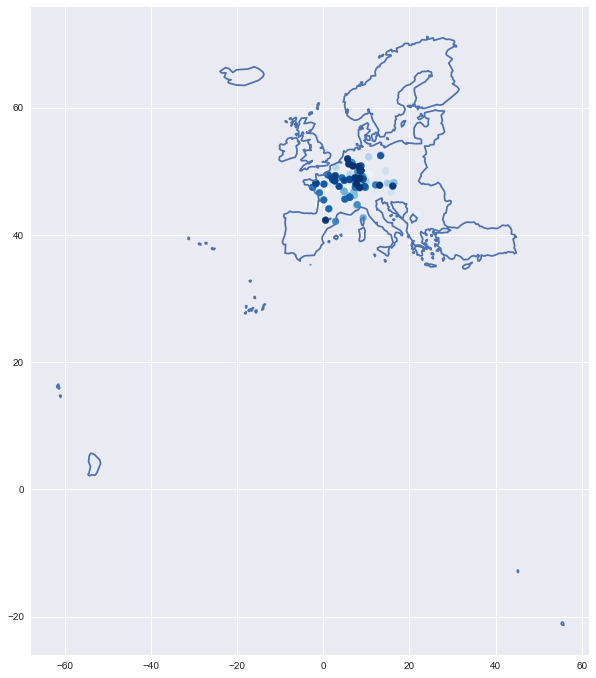

In [17]:
gdf_isodontia.set_crs(epsg=4326, inplace=True)
gdf_isodontia_europe = gpd.clip(gdf_isodontia, gdf_europe)
fig, ax = plt.subplots(figsize=(10,30))
gdf_europe.geometry.boundary.plot(ax=ax)
gdf_isodontia_europe.plot(ax=ax, c=gdf_isodontia['eventDate'], cmap='Blues');

Let's adapt our previous function to clip any extracted species to the extent given by another gdf. 

In [18]:
def download_occs(species_name):
    occ_dict = occ.search(scientificName=species_name)
    return occ_dict

def occs_to_gdf_clip(species_dict, clip_gdf):
    occ_df = pd.DataFrame.from_dict(species_dict['results'])
    occ_df = occ_df.dropna(subset=['decimalLatitude', 'decimalLongitude'])
    occ_df.to_csv("gbif_occ_" + species_dict['results'][0]['scientificName'].replace(" ","_") + ".csv")
    occ_gdf = gpd.GeoDataFrame(occ_df, geometry=gpd.points_from_xy(occ_df.decimalLongitude, occ_df.decimalLatitude))
    clip_crs = clip_gdf.crs
    occ_gdf.set_crs(clip_crs, inplace=True)
    occ_gdf_clipped = gpd.clip(occ_gdf, clip_gdf)

    return occ_gdf_clipped

And now test the function with a couple of species.

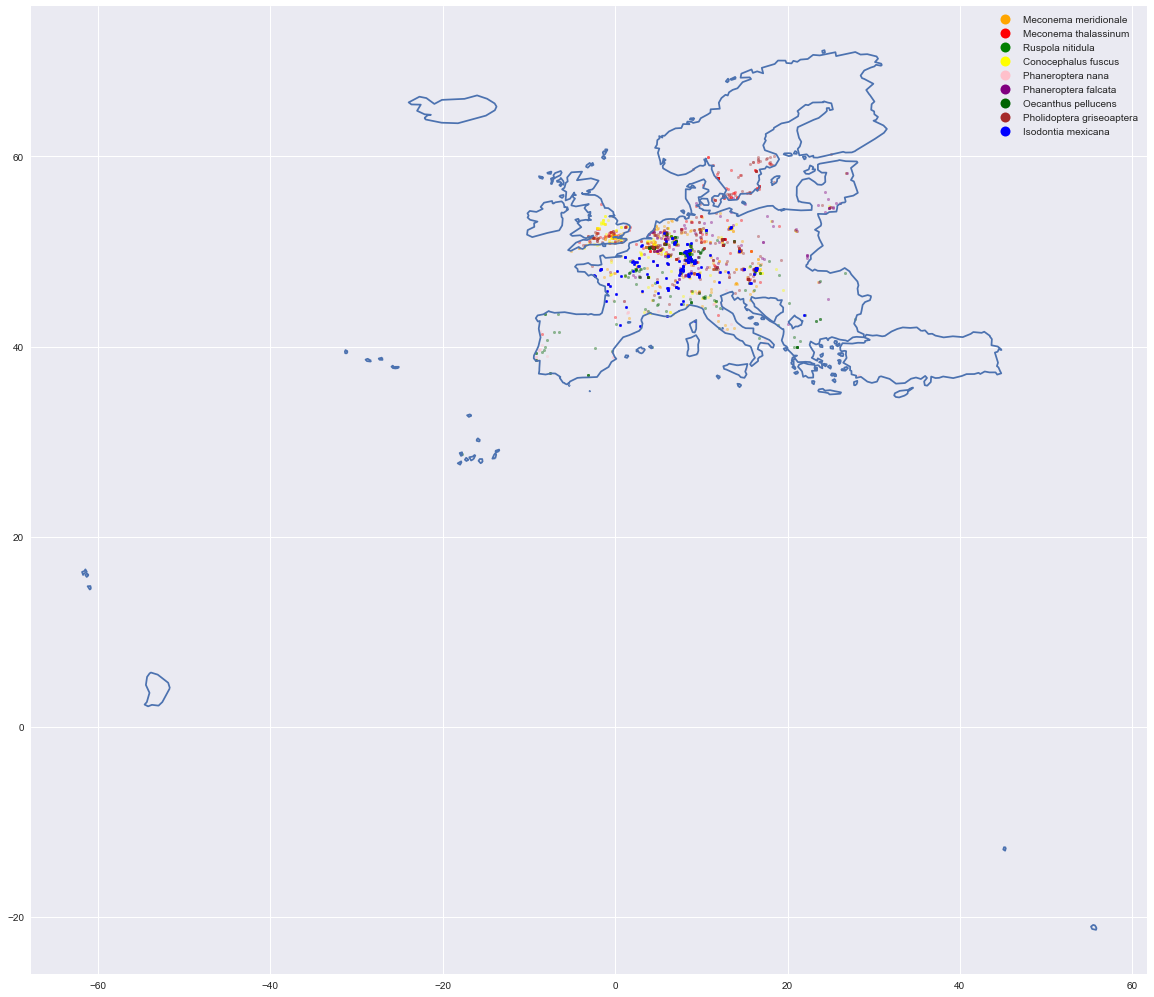

In [19]:
colors=['orange', 'red', 'green', 'yellow', 'pink', 'purple', 'darkgreen', 'brown', 'blue']
fig, ax = plt.subplots(figsize=((20,20)))
species_list = ['Meconema meridionale', 
                'Meconema thalassinum', 
                'Ruspola nitidula', 
                'Conocephalus fuscus',
                'Phaneroptera nana',
                'Phaneroptera falcata',
                'Oecanthus pellucens',
                'Pholidoptera griseoaptera',
                'Isodontia mexicana']
all_gdfs = []
for i, sp in enumerate(species_list):
    occs_dict = download_occs(sp)
    alpha = 0.4
    if occs_dict['results'] != []: # avoid error in case of empty result
        gdf = occs_to_gdf_clip(occs_dict, gdf_europe)
        all_gdfs.append(gdf)
        if i == len(species_list)-1:
            alpha=1.0
        gdf.plot(ax=ax, c=colors[i], markersize=7, alpha=alpha)
handles = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(species_list[i]) )[0]  for i in range(len(species_list)) ]
gdf_europe.geometry.boundary.plot(ax=ax)
ax.legend(handles=handles)
plt.show()

As stated before, he gbif search is limited to 300 occurences. They are sorted descending by date, which is why we only got occurences from 2020 and 2019 before. To be able to conduct some (spatio-)temporal analysis, let's limit the occurences to germany.

In [20]:
def occs_to_gdf(species_dict):
    occ_df = pd.DataFrame.from_dict(species_dict['results'])
    occ_df = occ_df.dropna(subset=['decimalLatitude', 'decimalLongitude'])
    occ_df.to_csv("gbif_occ_" + species_dict['results'][0]['scientificName'].replace(" ","_") + ".csv")
    occ_gdf = gpd.GeoDataFrame(occ_df, geometry=gpd.points_from_xy(occ_df.decimalLongitude, occ_df.decimalLatitude))

    return occ_gdf

In [21]:
isodontia_occ_dict_ger = occ.search(scientificName='Isodontia mexicana', country='DE')
gdf_isodontia_ger = occs_to_gdf(isodontia_occ_dict_ger)

And then plot a histogram of the years in which the observations were made.

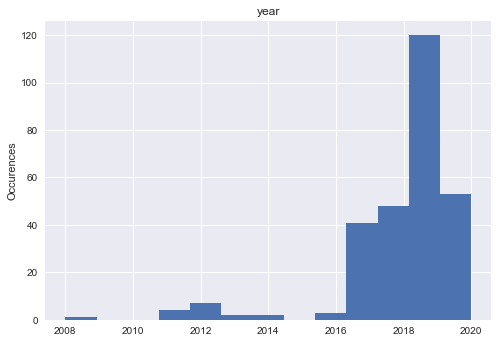

In [22]:
isodontia_ger_date_df = pd.DataFrame(gdf_isodontia_ger['year'])
isodontia_ger_date_df.hist(bins=13)
plt.ylabel('Occurences')
plt.show()

There is another way to plot the same thing. For that, we first have to convert the year column to datetime.

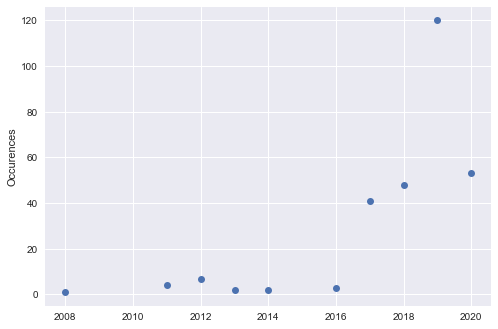

In [23]:
isodontia_ger_date_df['year'] = pd.to_datetime(isodontia_ger_date_df['year'], format='%Y')
year, number = np.unique(isodontia_ger_date_df, return_counts=True)
plt.plot_date(year, number)
plt.ylabel('Occurences')
plt.show()

We could furthermore look at the months, in which the species was found.

In [24]:
isodontia_ger_month_df = pd.DataFrame(gdf_isodontia_ger['month'])
month_nums = [1,2,3,4,5,6,7,8,9,10,11,12]
month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']

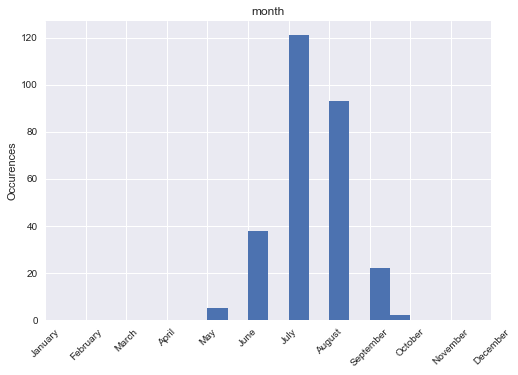

In [25]:
isodontia_ger_month_df.hist()
plt.xticks(ticks=month_nums, labels=month_names, rotation=45)
plt.ylabel('Occurences')
plt.show()

So in germany, most occurences happened in July and August.

And now let's show the observations on the map again and colour them by the date they were made.

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_isodontia_ger.plot(ax=ax, column='eventDate', cmap='Blues')
mplleaflet.display(fig=fig)

c:\users\hannah\anaconda3\envs\gbif\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
c:\users\hannah\anaconda3\envs\gbif\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Another way to visualize this could be a choropleth map. For this, let's get some administrative data of germany. We will use level 3 data here, once again downloaded from here: https://ec.europa.eu/eurostat/de/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts#nuts21

In [27]:
fp = "./NUTS_RG_10M_2021_4326_LEVL_3.shp/NUTS_RG_10M_2021_4326_LEVL_3.shp"
gdf_europe_lvl3 = gpd.read_file(fp)

We want to only extract administrative units for germany.

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
139,DE736,3,DE,Waldeck-Frankenberg,Waldeck-Frankenberg,4,3,3,DE736,"POLYGON ((9.15541 51.44267, 9.16673 51.37686, ..."
140,DE737,3,DE,Werra-Meißner-Kreis,Werra-Meißner-Kreis,2,3,3,DE737,"POLYGON ((9.92834 51.37530, 9.95493 51.30432, ..."
141,DE803,3,DE,"Rostock, Kreisfreie Stadt","Rostock, Kreisfreie Stadt",4,2,1,DE803,"POLYGON ((11.99909 54.17475, 12.12912 54.18569..."
142,DE804,3,DE,"Schwerin, Kreisfreie Stadt","Schwerin, Kreisfreie Stadt",4,3,2,DE804,"POLYGON ((11.30195 53.65295, 11.44947 53.68068..."
143,DE80J,3,DE,Mecklenburgische Seenplatte,Mecklenburgische Seenplatte,4,3,3,DE80J,"POLYGON ((12.98671 54.00397, 13.18150 53.93113..."


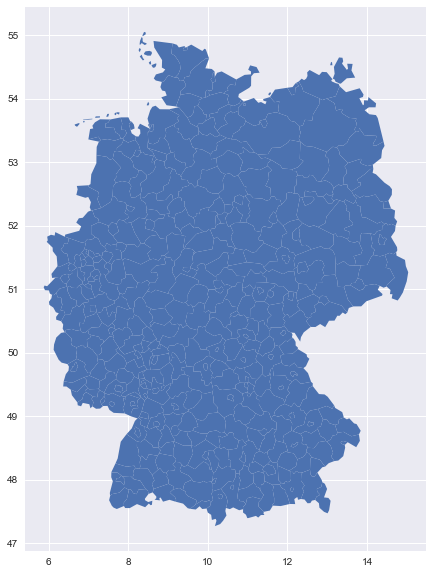

In [28]:
gdf_ger_lvl3 = gdf_europe_lvl3[gdf_europe_lvl3['CNTR_CODE']=='DE']
display(gdf_ger_lvl3.head())
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf_ger_lvl3.plot(ax=ax);

Awesome. To count the number of occurences of `Isodontia mexicana` in each county, we have to perform a spatial join and a merge. Before this, we have to make sure both dataframes are in the same coordinate reference system (CRS).

In [29]:
# for the spatial join, both must be in the same crs
# currently, the crs for the isodontia GeoDataFrame is not set, so we do that first
gdf_isodontia_ger.crs = "epsg:4326"
dfsjoin = gpd.sjoin(gdf_ger_lvl3, gdf_isodontia_ger)
dfpivot = pd.pivot_table(dfsjoin,index='NUTS_ID',columns='taxonKey',aggfunc={'taxonKey':len})
dfpivot.columns = dfpivot.columns.droplevel()
gdf_ger_lvl3_isodontia = gdf_ger_lvl3.merge(dfpivot, how='left',on='NUTS_ID')
display(gdf_ger_lvl3_isodontia.head())

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,1346919,10059015
0,DE736,3,DE,Waldeck-Frankenberg,Waldeck-Frankenberg,4,3,3,DE736,"POLYGON ((9.15541 51.44267, 9.16673 51.37686, ...",NaN,NaN
1,DE737,3,DE,Werra-Meißner-Kreis,Werra-Meißner-Kreis,2,3,3,DE737,"POLYGON ((9.92834 51.37530, 9.95493 51.30432, ...",NaN,NaN
2,DE803,3,DE,"Rostock, Kreisfreie Stadt","Rostock, Kreisfreie Stadt",4,2,1,DE803,"POLYGON ((11.99909 54.17475, 12.12912 54.18569...",NaN,NaN
3,DE804,3,DE,"Schwerin, Kreisfreie Stadt","Schwerin, Kreisfreie Stadt",4,3,2,DE804,"POLYGON ((11.30195 53.65295, 11.44947 53.68068...",NaN,NaN
4,DE80J,3,DE,Mecklenburgische Seenplatte,Mecklenburgische Seenplatte,4,3,3,DE80J,"POLYGON ((12.98671 54.00397, 13.18150 53.93113...",NaN,NaN


We now have the taxon key(s) as additional columns, which values are the number of observations made in the respective county. NaN-values indicate that no observation was made.

We can now plot the choropleth map. 

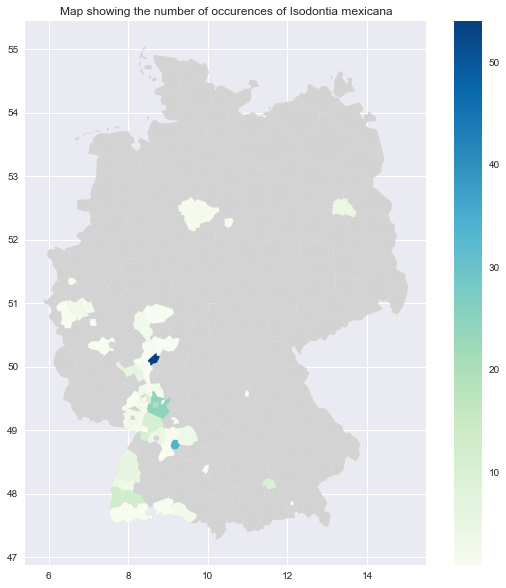

In [30]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf_ger_lvl3_isodontia.plot(ax=ax, color="lightgrey") #  conties with no observation will be shown in light grey
gdf_ger_lvl3_isodontia.plot(column=1346919, cmap="GnBu", ax=ax, legend=True)
plt.title("Map showing the number of occurences of Isodontia mexicana")
plt.show()

Note that we do not take other variables into account like the area of the county, etc.

Next, we will try to do the same for some of the preys and then investigate the co-occurence by building a co-occurenxe matrix. So we should write a function for this.

In [31]:
def sjoin_and_merge(polys, points, pivot_index, count_column):
    crs = polys.crs
    points.set_crs(crs, inplace=True)
    dfsjoin = gpd.sjoin(polys, points)
    dfpivot = pd.pivot_table(dfsjoin,index=pivot_index,columns=count_column,aggfunc={count_column:len})
    dfpivot.columns = dfpivot.columns.droplevel()
    polys_new = polys.merge(dfpivot, how='left',on=pivot_index)
    
    return polys_new

def plot_choropleth_map(polys, col, cmap):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    polys.plot(ax=ax, color="lightgrey")
    polys.plot(column=col, cmap=cmap, ax=ax, legend=True)

Let's quickly try this out for one species.

In [32]:
# query gbif database
m_meridionale_occ_dict_ger = occ.search(scientificName='Meconema meridionale', country='DE')
# dict to gdf
gdf_m_meridionale_ger = occs_to_gdf(m_meridionale_occ_dict_ger)

gdf_ger_lvl3_isodontia = sjoin_and_merge(gdf_ger_lvl3_isodontia, gdf_m_meridionale_ger, 'NUTS_ID', 'taxonKey')
gdf_ger_lvl3_isodontia.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,1346919,10059015,1690429
0,DE736,3,DE,Waldeck-Frankenberg,Waldeck-Frankenberg,4,3,3,DE736,"POLYGON ((9.15541 51.44267, 9.16673 51.37686, ...",NaN,NaN,NaN
1,DE737,3,DE,Werra-Meißner-Kreis,Werra-Meißner-Kreis,2,3,3,DE737,"POLYGON ((9.92834 51.37530, 9.95493 51.30432, ...",NaN,NaN,2.0
2,DE803,3,DE,"Rostock, Kreisfreie Stadt","Rostock, Kreisfreie Stadt",4,2,1,DE803,"POLYGON ((11.99909 54.17475, 12.12912 54.18569...",NaN,NaN,2.0
3,DE804,3,DE,"Schwerin, Kreisfreie Stadt","Schwerin, Kreisfreie Stadt",4,3,2,DE804,"POLYGON ((11.30195 53.65295, 11.44947 53.68068...",NaN,NaN,NaN
4,DE80J,3,DE,Mecklenburgische Seenplatte,Mecklenburgische Seenplatte,4,3,3,DE80J,"POLYGON ((12.98671 54.00397, 13.18150 53.93113...",NaN,NaN,1.0


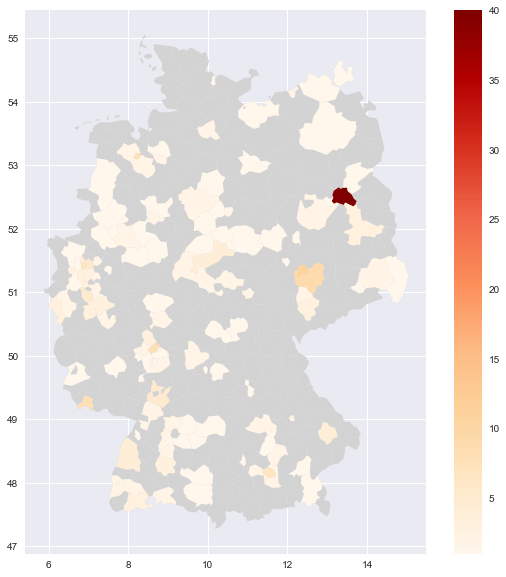

In [33]:
plot_choropleth_map(gdf_ger_lvl3_isodontia, 1690429, 'OrRd')

Nice. So we can wrap this in a for-loop and append the counts of multiple species to the geodataframe!

In [34]:
species_list_2 = ['Meconema thalassinum', 
                'Ruspola nitidula', 
                'Conocephalus fuscus',
                'Phaneroptera nana',
                'Phaneroptera falcata',
                'Oecanthus pellucens',
                'Pholidoptera griseoaptera']
for sp in species_list_2:
    # query gbif database
    occ_dict_ger = occ.search(scientificName=sp, country='DE')
    # dict to gdf
    if occ_dict_ger['results'] != []: # avoid error in case of empty result
        gdf_occ_ger = occs_to_gdf(occ_dict_ger)
        gdf_ger_lvl3_isodontia = sjoin_and_merge(gdf_ger_lvl3_isodontia, gdf_occ_ger, 'NUTS_ID', 'taxonKey')

gdf_ger_lvl3_isodontia.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,1346919,10059015,1690429,1690432,1683067,1686202,1686243,1720967,1695297
0,DE736,3,DE,Waldeck-Frankenberg,Waldeck-Frankenberg,4,3,3,DE736,"POLYGON ((9.15541 51.44267, 9.16673 51.37686, ...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
1,DE737,3,DE,Werra-Meißner-Kreis,Werra-Meißner-Kreis,2,3,3,DE737,"POLYGON ((9.92834 51.37530, 9.95493 51.30432, ...",NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,2.0
2,DE803,3,DE,"Rostock, Kreisfreie Stadt","Rostock, Kreisfreie Stadt",4,2,1,DE803,"POLYGON ((11.99909 54.17475, 12.12912 54.18569...",NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
3,DE804,3,DE,"Schwerin, Kreisfreie Stadt","Schwerin, Kreisfreie Stadt",4,3,2,DE804,"POLYGON ((11.30195 53.65295, 11.44947 53.68068...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DE80J,3,DE,Mecklenburgische Seenplatte,Mecklenburgische Seenplatte,4,3,3,DE80J,"POLYGON ((12.98671 54.00397, 13.18150 53.93113...",NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN


Notice that we now have a lot of additional columns with the taxon keys and their observation numbers in the GeoDataFrame.  

Let's plot choropleth maps for all of the species. 

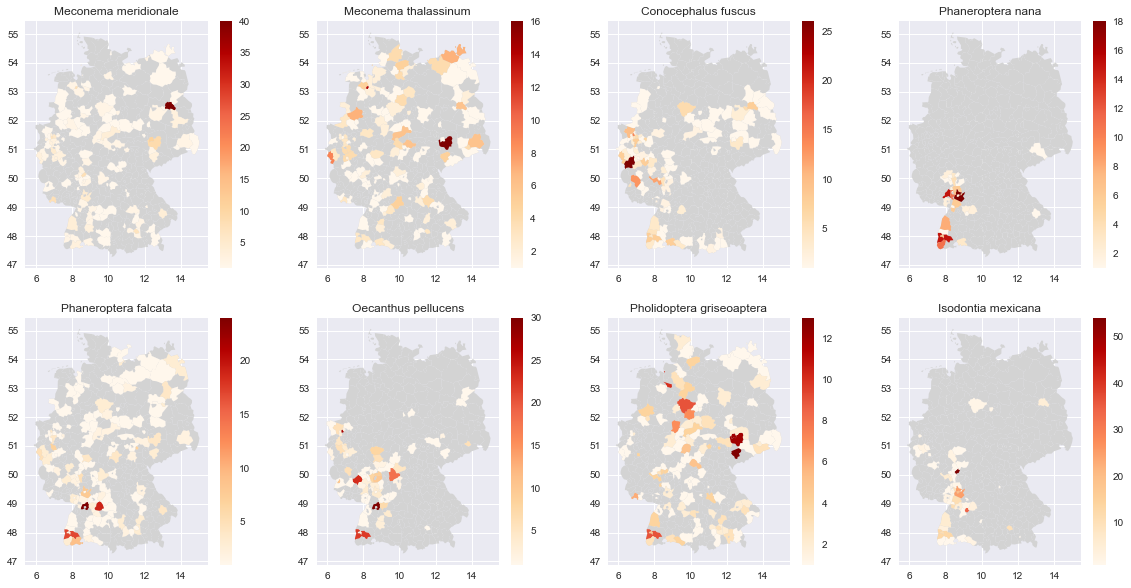

In [62]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
i = 0
for sp in species_list:
    col = species_keys[species_list.index(sp)]
    if col not in gdf_ger_lvl3_isodontia.columns:
        continue
    if i < 4:
        plt_row = 0
        plt_col = i
    elif i >= 4:
        plt_row = 1
        plt_col = i-4
    gdf_ger_lvl3_isodontia.plot(ax=ax[plt_row][plt_col], color="lightgrey")
    gdf_ger_lvl3_isodontia.plot(column=col, cmap='OrRd', ax=ax[plt_row][plt_col], legend=True)
    ax[plt_row][plt_col].title.set_text(sp)
    i += 1
plt.show()

Let's create a new DataFrame with only the columsn `Nuts_ID` and the columns with the taxonKeys. The taxon keys are a bit annoying. Let's create a taxon key list from our species list, so we can properly query our DataFrame or later reclassify.

In [35]:
species_keys = [species.name_backbone(x)['usageKey'] for x in species_list]
print(species_keys)

[1690429, 1690432, 5096614, 1683067, 1686202, 1686243, 1720967, 1695297, 1346919]


In [36]:
keys = ['NUTS_ID'] + species_keys
keys = [key for key in keys if key in gdf_ger_lvl3_isodontia.columns]
gdf_ger_lvl3_occs = gdf_ger_lvl3_isodontia[keys]
gdf_ger_lvl3_occs.set_index('NUTS_ID', inplace=True)

Furthermore, we do not want the number of occurences in the dataframe, but simply 0 and 1 to indicate if there was any occurence or none in the county. So let's reclassify in the end: `> 0 -> 1; NaN -> 0`

In [37]:
gdf_ger_lvl3_occs.values[gdf_ger_lvl3_occs.values>0] = 1
gdf_ger_lvl3_occs.fillna(0, inplace=True)
gdf_ger_lvl3_occs

c:\users\hannah\anaconda3\envs\gbif\lib\site-packages\pandas\core\frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,1690429,1690432,1683067,1686202,1686243,1720967,1695297,1346919
NUTS_ID,,,,,,,,
DE736,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
DE737,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
DE803,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
DE804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE80J,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
DEA45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
DEA46,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DEA47,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


From this, we can build the co-occurence matrix.

In [38]:
df_asint = gdf_ger_lvl3_occs.astype(int)
df_cooc = df_asint.T.dot(df_asint)
display(df_cooc)

,1690429,1690432,1683067,1686202,1686243,1720967,1695297,1346919
1690429,124,64,51,16,62,33,61,27
1690432,64,127,45,10,62,27,53,20
1683067,51,45,99,15,54,33,35,28
1686202,16,10,15,30,21,18,16,25
1686243,62,62,54,21,131,38,53,34
1720967,33,27,33,18,38,67,28,24
1695297,61,53,35,16,53,28,120,25
1346919,27,20,28,25,34,24,25,50


We want to fill the diagonals with zeros.

In [39]:
df_cooc_f = df_cooc.copy()
np.fill_diagonal(df_cooc_f.values, 0)
display(df_cooc_f)

,1690429,1690432,1683067,1686202,1686243,1720967,1695297,1346919
1690429,0,64,51,16,62,33,61,27
1690432,64,0,45,10,62,27,53,20
1683067,51,45,0,15,54,33,35,28
1686202,16,10,15,0,21,18,16,25
1686243,62,62,54,21,0,38,53,34
1720967,33,27,33,18,38,0,28,24
1695297,61,53,35,16,53,28,0,25
1346919,27,20,28,25,34,24,25,0


The taxon keys do not tell us much. Let's reclassify the indices and columns.

In [40]:
reclass_dict = dict(zip(species_keys, species_list))
print(reclass_dict)

{1690429: 'Meconema meridionale', 1690432: 'Meconema thalassinum', 5096614: 'Ruspola nitidula', 1683067: 'Conocephalus fuscus', 1686202: 'Phaneroptera nana', 1686243: 'Phaneroptera falcata', 1720967: 'Oecanthus pellucens', 1695297: 'Pholidoptera griseoaptera', 1346919: 'Isodontia mexicana'}


In [41]:
df_cooc_f = df_cooc_f.rename(reclass_dict, axis='index').rename(reclass_dict, axis='columns')

But now we only want the co-occurences for `Isodontia mexicana` so let's extract just those columns and make a bar plot. 

Phaneroptera falcata         34
Conocephalus fuscus          28
Meconema meridionale         27
Pholidoptera griseoaptera    25
Phaneroptera nana            25
Oecanthus pellucens          24
Meconema thalassinum         20
Isodontia mexicana            0
Name: Isodontia mexicana, dtype: int32

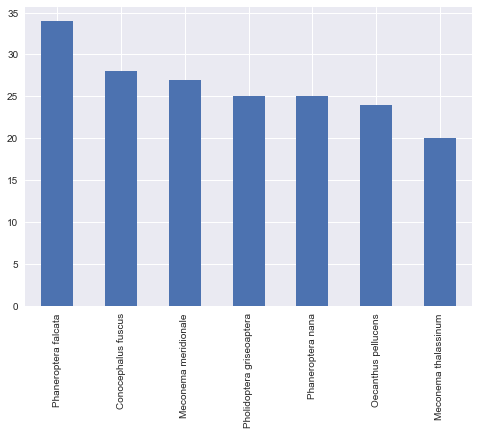

In [42]:
cooc_isodontia = df_cooc_f['Isodontia mexicana'].sort_values(ascending=False)
display(cooc_isodontia)
cooc_isodontia.drop('Isodontia mexicana').plot(kind='bar');

In germany, we get the highest co-occurece of Isodontia with the prey species *Phaneroptera falcata* (34), but also the other prey species co-occur in more than 20 counties.

There is some information missing. It would be more helpful to get some relative numbers, i.e. the percentage of counties in which *Isodontia mexicana* co-occurs with one of the prey species. For this, we have to divide my the total number of counties in which *I. mexicana* occurs.  

We can access this value in mutliple ways. One way would be from the co-occurence matrix, where diagonals were not filled.

In [43]:
n_counties_isodontia = df_cooc.loc[1346919, 1346919]

In [44]:
cooc_isodontia = cooc_isodontia/n_counties_isodontia*100
display(cooc_isodontia)

Phaneroptera falcata         68.0
Conocephalus fuscus          56.0
Meconema meridionale         54.0
Pholidoptera griseoaptera    50.0
Phaneroptera nana            50.0
Oecanthus pellucens          48.0
Meconema thalassinum         40.0
Isodontia mexicana            0.0
Name: Isodontia mexicana, dtype: float64

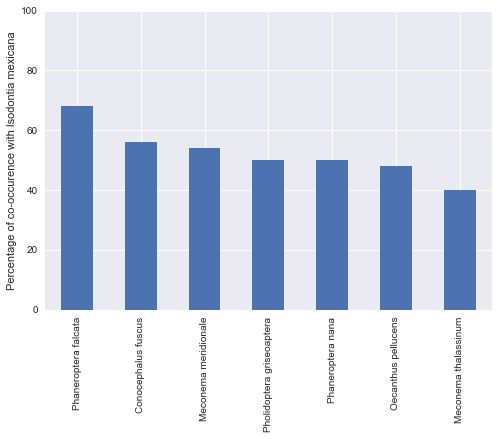

In [45]:
cooc_isodontia.drop('Isodontia mexicana').plot(kind='bar')
plt.ylim(0, 100)
plt.ylabel("Percentage of co-occurence with Isodontia mexicana")
plt.show()